In [1]:
# Module
import numpy as np
import pandas as pd
import os
from scipy import signal
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display

In [12]:
# Audio path
def get_audio_path(audio_dir, track_id):
    return os.path.join(audio_dir, track_id)
# Get event start
def get_event_start(pd_dataframe, track_id, fs, adj = 0.2):
    df = pd_dataframe
    df = df.loc[df['track-id'] == track_id]
    event_start_s = df['event-start-s'] -adj
    event_start = int(event_start_s * fs)
    return event_start

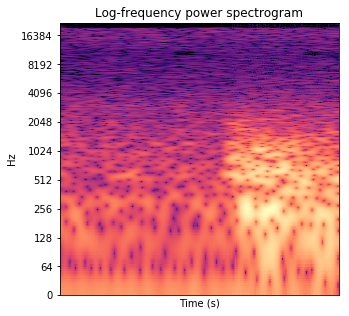

In [56]:
# Track-id
tid = 'A-093001.m4a'

audio_folder = '../../indoor-noise-set/SNU-B36-50E/audio/'
metadata_path = '../../indoor-noise-set/metadata.csv'
metadata_df = pd.read_csv(metadata_path)

audio_path = get_audio_path(audio_folder, tid)
audio, fs = librosa.load(audio_path, sr=None)
event_start_loc = get_event_start(pd_dataframe=metadata_df, track_id=tid, fs=fs)
audio = audio[event_start_loc : event_start_loc+int(0.3 * fs)]

# compute spectrogram
M = 1024
win = np.hamming(M);
zpf = 8;
nfft = M*zpf;

spec = librosa.core.stft(audio, n_fft=nfft, hop_length=int(M/100), win_length=M, window=win, center=True)
hpspec = np.zeros(np.shape(spec))
nframe = np.shape(spec)[1]
fi = np.linspace(0, fs/2, num=np.shape(spec)[0])
ti = np.linspace(0, len(audio)/fs, num=np.shape(spec)[1])

plt.figure(figsize=(5,5))
D = librosa.amplitude_to_db(np.abs(spec), ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=fs)
plt.title('Log-frequency power spectrogram')
plt.xlabel('Time (s)')
plt.show()